<a href="https://www.kaggle.com/code/ehetshamshaukat/lung-cancer-analysis-and-model?scriptVersionId=103893479" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. **Data analysis**

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import offline
from plotly import graph_objs as go
from plotly import express as px

In [2]:
dataset=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [3]:
dataset.shape

(309, 16)

In [4]:
dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
14,M,69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO
195,M,69,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
122,M,57,2,1,2,1,2,2,1,1,1,1,2,1,1,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES
188,M,65,2,2,2,2,2,1,1,1,1,1,1,1,1,YES


In [5]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Preprocessing

In [8]:
dataset.columns=dataset.columns.str.title()

In [9]:
dataset.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [10]:
dataset.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [11]:
dataset["Gender"]=dataset["Gender"].replace(["M","F"],["Male","Female"])
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        dataset[x]=dataset[x].replace([1,2],[0,1])

In [12]:
dataset.sample(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
10,Female,61,1,1,1,1,1,1,0,1,0,1,1,1,0,YES
194,Male,63,0,0,0,0,1,1,1,0,1,1,1,0,1,YES
23,Male,60,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
42,Female,77,0,1,1,1,1,1,0,1,1,0,0,0,0,YES
63,Female,68,0,0,1,0,1,0,1,1,1,0,0,1,0,YES


Feature Engineering

In [13]:
dataset.loc[(dataset['Age'] >= 0) & (dataset["Age"] <= 9),"In_age"]="In 0's"
dataset.loc[(dataset['Age'] >= 10) & (dataset["Age"] <= 19),"In_age"]="In 10's"
dataset.loc[(dataset['Age'] >= 20) & (dataset["Age"] <= 29),"In_age"]="In 20's"
dataset.loc[(dataset['Age'] >= 30) & (dataset["Age"] <= 39),"In_age"]="In 30's"
dataset.loc[(dataset['Age'] >= 40) & (dataset["Age"] <= 49),"In_age"]="In 40's"
dataset.loc[(dataset['Age'] >= 50) & (dataset["Age"] <= 59),"In_age"]="In 50's"
dataset.loc[(dataset['Age'] >= 60) & (dataset["Age"] <= 69),"In_age"]="In 60's"
dataset.loc[(dataset['Age'] >= 70) & (dataset["Age"] <= 79),"In_age"]="In 70's"
dataset.loc[(dataset['Age'] >= 80) & (dataset["Age"] <= 89),"In_age"]="In 80's"

Analysis

Gender Vs. Lung Cancer

In [14]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
gender_type_count=dataset["Gender"].value_counts(sort=True)
gender_type_count

Male      162
Female    147
Name: Gender, dtype: int64

In [16]:
values=gender_type_count.values
labels=gender_type_count.index
trace0=go.Pie(values=values,labels=labels,hole=0.4,textposition="inside",textinfo="label+percent+value")
data=[trace0]
layout=dict(title="Gender Distribution",title_x=0.5,annotations=[dict(text="Gender",x=0.5,y=0.5,showarrow=False,font_size=14)])
fig=dict(data=data,layout=layout)
offline.iplot(fig)

In [17]:
gender_vs_cancer=dataset.groupby(["Gender","Lung_Cancer"]).agg(total_cancer=("Lung_Cancer","count"),minimum_age=("Age","min"),maximum_age=("Age","max")).reset_index()
gender_vs_cancer

,Gender,Lung_Cancer,total_cancer,minimum_age,maximum_age
0,Female,NO,22,21,87
1,Female,YES,125,38,81
2,Male,NO,17,46,69
3,Male,YES,145,39,79


In [18]:
fig=px.sunburst(gender_vs_cancer,path=["Gender","Lung_Cancer"],values="total_cancer")
fig.update_layout(title="Gender Vs. Cancer",title_x=0.5)
fig.show()

Age

In [19]:
dataset["Age"].min()

21

In [20]:
dataset["Age"].max()

87

alcohol consumption

In [21]:
dataset["Alcohol Consuming"].unique()

array([1, 0])

In [22]:
alcohol_con=dataset["Alcohol Consuming"].value_counts(sort=True)
alcohol_con

1    172
0    137
Name: Alcohol Consuming, dtype: int64

In [23]:
labels=alcohol_con.index
values=alcohol_con.values
trace0=go.Pie(labels=labels,values=values,hole=0.4,textposition="inside",textinfo="label+percent+value")
data=[trace0]
layout=dict(title="Achohol Comsuption",title_x=0.5,annotations=[dict(text="Detection",x=0.5,y=0.5,showarrow=False)])
fig=dict(data=data,layout=layout)
offline.iplot(fig)

In [24]:
in_age_vs_cancer=dataset.groupby(["In_age","Lung_Cancer"]).agg(total=("Lung_Cancer","count")).reset_index()
in_age_vs_cancer

,In_age,Lung_Cancer,total
0,In 20's,NO,1
1,In 30's,YES,2
2,In 40's,NO,2
3,In 40's,YES,10
4,In 50's,NO,13
5,In 50's,YES,78
6,In 60's,NO,20
7,In 60's,YES,114
8,In 70's,NO,2
9,In 70's,YES,64


In [25]:
fig=px.sunburst(in_age_vs_cancer,path=["Lung_Cancer","In_age"],values="total")
fig.update_layout(title="Age Vs. Cancer Detection",title_x=0.5)
fig.show()

# Machine learning

importing libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

preprocessing

In [27]:
dataset["Gender"]=dataset["Gender"].replace(["Male","Female"],[1,0])
dataset["Lung_Cancer"]=dataset["Lung_Cancer"].replace(["YES","NO"],[1,0])

data spliting

In [28]:
X=dataset.drop(["Lung_Cancer","In_age"],axis=1)
y=dataset["Lung_Cancer"]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [30]:
ytest

224    1
210    1
63     1
192    1
218    1
      ..
236    1
252    1
232    1
300    1
5      1
Name: Lung_Cancer, Length: 62, dtype: int64

model training

In [31]:
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [32]:
predicted_value=lr.predict(xtest)
predicted_value

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

comparing

In [33]:
comparation=pd.DataFrame({"Actual Value":ytest,"Predicted Value":predicted_value})
comparation.sample(10)

,Actual Value,Predicted Value
194,1,1
54,1,1
238,1,1
192,1,1
99,1,1
9,1,1
215,0,0
42,1,1
229,1,1
149,1,1


Model evalution

In [34]:
av=comparation["Actual Value"]
pv=comparation["Predicted Value"]
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

Accuracy score:  0.9516129032258065
Precision score:  0.9491525423728814
Recall score:  1.0


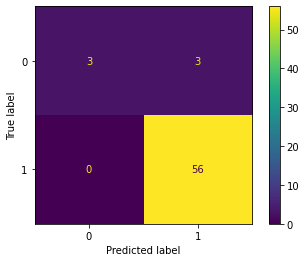

In [35]:
cmd=ConfusionMatrixDisplay.from_predictions(comparation["Actual Value"],comparation["Predicted Value"])
cmd